In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

### Problem 1, (1) Gaussian quadrature

In [14]:
# Define the function
def f(x):
    return 4*x**3 - (x + 3)**(-2) - 2*x + 5

# Gaussian Quadrature method
result_gauss, error_gauss = integrate.quadrature(f, -2, 1)
print(f"Gaussian Quadrature result: {result_gauss}")

Gaussian Quadrature result: 2.2500000007464926


C:\Users\jhyang\AppData\Local\Temp\ipykernel_25052\2804665587.py:6: DeprecationWarning: `scipy.integrate.quadrature` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result_gauss, error_gauss = integrate.quadrature(f, -2, 1)


In [15]:
# Define the function
def f(x):
    return 4*x**3 - (x + 3)**(-2) - 2*x + 5

# Compute the true value using quad (very accurate)
true_value, error = integrate.quad(f, -2, 1)
print(f"True value: {true_value}")

True value: 2.249999999999999


In [16]:
# Calculate absolute error
error = abs(true_value - result_gauss)
print(f"Absolute Error: {error}")
print("It is close!!!")

Absolute Error: 7.464935336543022e-10
It is close!!!


### Problem 1, (2) Midpoint sum

n = 10, Midpoint Sum Result = 2.3921617861870783, Absolute Error = 0.1421617861870792
n = 60, Midpoint Sum Result = 2.253954896370443, Absolute Error = 0.003954896370443883
n = 110, Midpoint Sum Result = 2.251176701347723, Absolute Error = 0.001176701347723963
n = 160, Midpoint Sum Result = 2.250556179260962, Absolute Error = 0.0005561792609629634
n = 210, Midpoint Sum Result = 2.2503228623070184, Absolute Error = 0.0003228623070192782
n = 260, Midpoint Sum Result = 2.2502106249458516, Absolute Error = 0.0002106249458524445
n = 310, Midpoint Sum Result = 2.2501481608396694, Absolute Error = 0.00014816083967028604
n = 360, Midpoint Sum Result = 2.250109863140737, Absolute Error = 0.0001098631407376871
n = 410, Midpoint Sum Result = 2.2500847011731717, Absolute Error = 8.470117317260772e-05
n = 460, Midpoint Sum Result = 2.250067288611044, Absolute Error = 6.728861104488004e-05


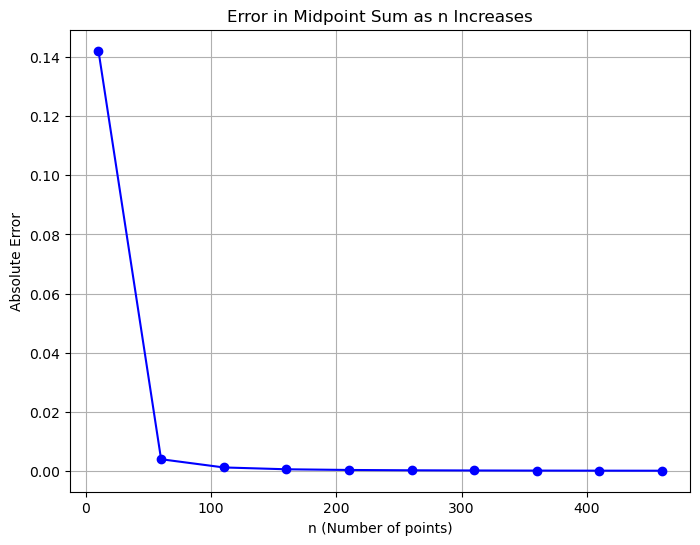

In [17]:
# Define the function
def f(x):
    return 4*x**3 - (x + 3)**(-2) - 2*x + 5

# Midpoint sum method
def midpoint_sum(f, a, b, n):
    h = (b - a) / n
    midpoints = np.linspace(a + h/2, b - h/2, n)
    return h * np.sum(f(midpoints))

# Compute the true value using scipy.integrate.quad
true_value, _ = integrate.quad(f, -2, 1)

# Define a range of n values
n_values = np.arange(10, 510, 50)

# Lists to store the results and errors
midpoint_results = []
midpoint_errors = []

# Compute midpoint sum for different n values and calculate errors
for n in n_values:
    result_midpoint = midpoint_sum(f, -2, 1, n)
    midpoint_results.append(result_midpoint)
    error = np.abs(result_midpoint - true_value)
    midpoint_errors.append(error)
    print(f"n = {n}, Midpoint Sum Result = {result_midpoint}, Absolute Error = {error}")

# Plot the error vs n
plt.figure(figsize=(8, 6))
plt.plot(n_values, midpoint_errors, marker='o', linestyle='-', color='b')
plt.title('Error in Midpoint Sum as n Increases')
plt.xlabel('n (Number of points)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

### Problem 1, (3) Simpson sum

n = 10, Simpson's Rule Result = 2.249160012524373, Absolute Error = 0.0008399874756261916
n = 60, Simpson's Rule Result = 2.249999174813552, Absolute Error = 8.251864471731096e-07
n = 110, Simpson's Rule Result = 2.2499999265016717, Absolute Error = 7.349832742420404e-08
n = 160, Simpson's Rule Result = 2.249999983557248, Absolute Error = 1.644275116063909e-08
n = 210, Simpson's Rule Result = 2.249999994456223, Absolute Error = 5.5437761048438006e-09
n = 260, Simpson's Rule Result = 2.249999997640068, Absolute Error = 2.359930917350539e-09
n = 310, Simpson's Rule Result = 2.249999998832096, Absolute Error = 1.167903107557322e-09
n = 360, Simpson's Rule Result = 2.2499999993577826, Absolute Error = 6.422165022001991e-10
n = 410, Simpson's Rule Result = 2.249999999618247, Absolute Error = 3.817519633741995e-10
n = 460, Simpson's Rule Result = 2.249999999759062, Absolute Error = 2.4093704809047267e-10


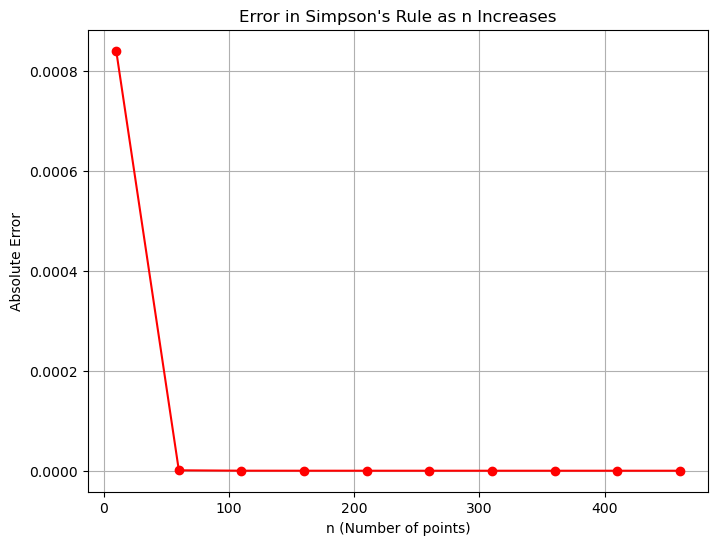

In [18]:
# Define the function
def f(x):
    return 4*x**3 - (x + 3)**(-2) - 2*x + 5

# Simpson's rule method
def simpson_sum(f, a, b, n):
    if n % 2 == 1:  # n must be even
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))

# Compute the true value using quad
true_value, _ = integrate.quad(f, -2, 1)

# Range of n values
n_values = np.arange(10, 510, 50)

# Lists to store results and errors for Simpson's Rule
simpson_results = []
simpson_errors = []

# Compute Simpson's rule for different n values and calculate errors
for n in n_values:
    result_simpson = simpson_sum(f, -2, 1, n)
    simpson_results.append(result_simpson)
    error = np.abs(result_simpson - true_value)
    simpson_errors.append(error)
    print(f"n = {n}, Simpson's Rule Result = {result_simpson}, Absolute Error = {error}")

# Plotting error vs n for Simpson's rule
plt.figure(figsize=(8, 6))
plt.plot(n_values, simpson_errors, marker='o', linestyle='-', color='r')
plt.title('Error in Simpson\'s Rule as n Increases')
plt.xlabel('n (Number of points)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()